In [7]:
import numpy as np
import scipy.sparse as sparse
from scipy.sparse.linalg import gmres
import matplotlib.pyplot as plt

In [8]:
from SATh_utilities import *

In [32]:
def param_title(dict_, *args):
#This function allows us to print the parameters used for the simulation as the title of a plot.
    for tag in args:
        del dict_[tag]
    plt.title(dict_)

In [10]:
def compare_errors(u1,u2):
#A function to compare the norm error of two functions
    return np.linalg.norm(u1-u2)

Let's plot with a good CFL : 0.5 and a "small" grid (size=Nx=100), with a smooth bell as initial function

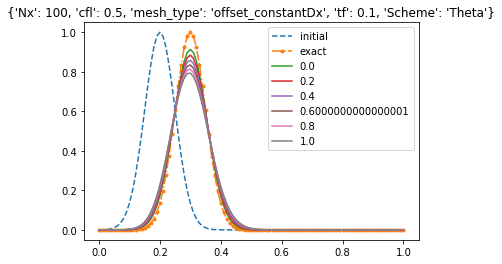

In [66]:
parameters = {"a":0,"b":1, "Nx":100, "cfl":.5, "mesh_type":"offset_constantDx",
              "params":.2, "init_func":"bell", "tf":.1, "theta":0, "Scheme":"Theta"}
solving = Problem(**parameters)

fig, ax = plt.subplots()
X = solving.mesh.nodes

ax.plot(X, solving.funcs.init_sol, "--", label="initial")
ax.plot(X, solving.sol_ex(), ".-.", label="exact")
for theta in np.linspace(0,1, 6):
    parameters["theta"] = theta
    solving = Problem(**parameters)
    ax.plot(X, solving.sol_num, label=f"{theta}")

plt.legend()
param_title(parameters, "a","b","theta","params","init_func")

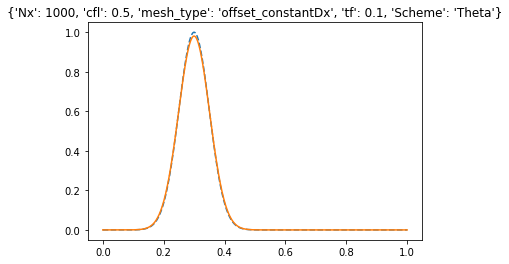

In [44]:
parameters = {"a":0,"b":1, "Nx":1000, "cfl":.5, "mesh_type":"offset_constantDx",
              "params":.2, "init_func":"bell", "tf":.1, "theta":.5, "Scheme":"Theta"}
solving = Problem(**parameters)
fig, ax = plt.subplots()
X = solving.mesh.nodes
ax.plot(X, solving.sol_ex(), "--")
ax.plot(X, solving.sol_num)
param_title(parameters)

We plot the errors, along with the simulations on a "bigger" mesh to compare:

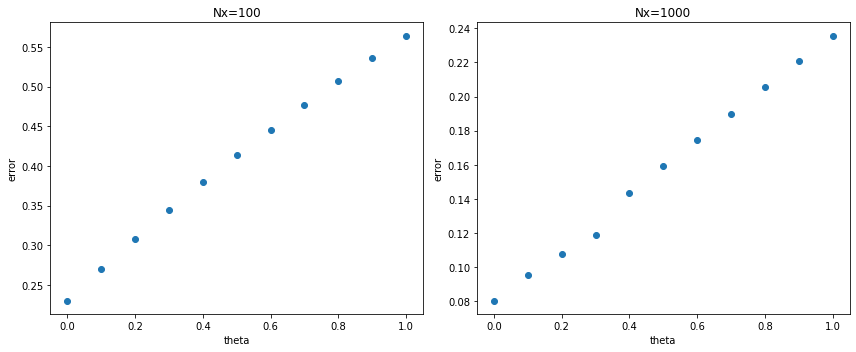

In [73]:
plt.figure(figsize=(12, 5)) 
thetas = np.arange(0,11)/10


# Errors for Nx=100
parameters = {"a":0,"b":1, "Nx":100, "cfl":.5, "mesh_type":"offset_constantDx",
              "params":.2, "init_func":"bell", "tf":.1, "theta":0, "Scheme":"Theta"}
values = []
for theta in thetas:
    parameters["theta"] = theta
    solving = Problem(**parameters)
    values.append(compare_errors(solving.sol_num, solving.sol_ex()))

plt.subplot(1, 2, 1)
plt.scatter(thetas, values)
plt.title("Nx=100")
plt.xlabel('theta')
plt.ylabel('error')
#plt.legend()

# Errors for Nx=1000
parameters = {"a":0,"b":1, "Nx":1000, "cfl":.5, "mesh_type":"offset_constantDx",
              "params":.2, "init_func":"bell", "tf":.1, "theta":0, "Scheme":"Theta"}
values = []
for theta in thetas:
    parameters["theta"] = theta
    solving = Problem(**parameters)
    values.append(compare_errors(solving.sol_num, solving.sol_ex()))

plt.subplot(1, 2, 2)
plt.scatter(thetas, values)
plt.title("Nx=1000")
plt.xlabel('theta')
plt.ylabel('error')

plt.tight_layout()
plt.show()


As the CFL is very good, the Explicit scheme is better. We can see that the errors are lower with a more precise grid, as expected (-> convergence).

Let's look at the discontinuity:

ok
ok
ok
ok
ok
ok
ok


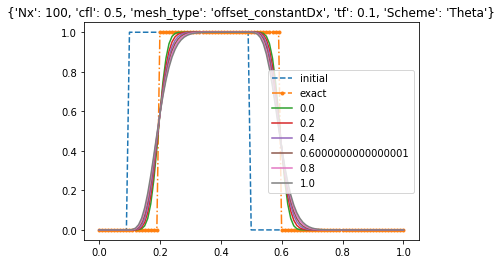

In [6]:
parameters = {"a":0,"b":1, "Nx":100, "cfl":.5, "mesh_type":"offset_constantDx",
              "params":[.1,.5], "init_func":"jump_periodical", "tf":.1, "theta":0, "Scheme":"Theta"}
solving = Problem(**parameters)

fig, ax = plt.subplots()
X = solving.mesh.nodes

ax.plot(X, solving.funcs.init_sol, "--", label="initial")
ax.plot(X, solving.sol_ex(), ".-.", label="exact")
for theta in np.linspace(0,1, 6):
    parameters["theta"] = theta
    solving = Problem(**parameters)
    ax.plot(X, solving.sol_num, label=f"{theta}")

plt.legend()
param_title(parameters, "a","b","theta","params","init_func")

What happens with a bad CFL (let's take 5)?

Nx = 100:

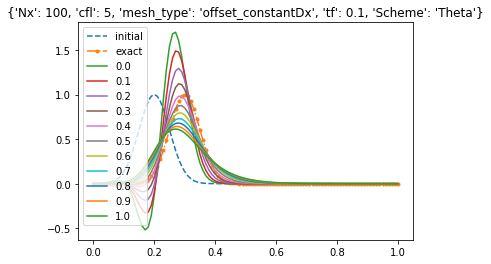

In [18]:
parameters = {"a":0,"b":1, "Nx":100, "cfl":5, "mesh_type":"offset_constantDx",
              "params":.2, "init_func":"bell", "tf":.1, "theta":0, "Scheme":"Theta"}
solving = Problem(**parameters)

fig, ax = plt.subplots()
X = solving.mesh.nodes

ax.plot(X, solving.funcs.init_sol, "--", label="initial")
ax.plot(X, solving.sol_ex(), ".-.", label="exact")
for theta in np.arange(0,11)/10:
    parameters["theta"] = theta
    solving = Problem(**parameters)
    ax.plot(X, solving.sol_num, label=f"{theta}")

plt.legend()
param_title(parameters, "a","b","theta","params","init_func")

We can see that the best numerical solutions are around 0.4 (errors below)

Nx = 1000:

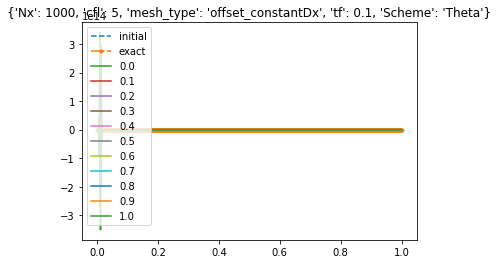

In [19]:
parameters = {"a":0,"b":1, "Nx":1000, "cfl":5, "mesh_type":"offset_constantDx",
              "params":.2, "init_func":"bell", "tf":.1, "theta":0, "Scheme":"Theta"}
solving = Problem(**parameters)

fig, ax = plt.subplots()
X = solving.mesh.nodes

ax.plot(X, solving.funcs.init_sol, "--", label="initial")
ax.plot(X, solving.sol_ex(), ".-.", label="exact")
for theta in np.arange(0,11)/10:
    parameters["theta"] = theta
    solving = Problem(**parameters)
    ax.plot(X, solving.sol_num, label=f"{theta}")

plt.legend()
param_title(parameters, "a","b","theta","params","init_func")

the numerical solutions with theta close to the explicit scheme are unhinged. Let's cut them

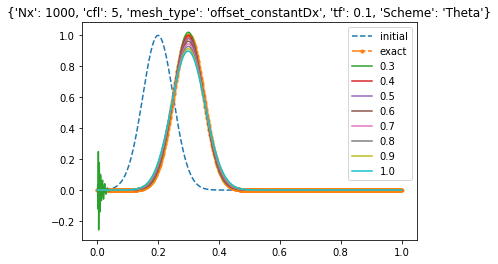

In [20]:
parameters = {"a":0,"b":1, "Nx":1000, "cfl":5, "mesh_type":"offset_constantDx",
              "params":.2, "init_func":"bell", "tf":.1, "theta":0, "Scheme":"Theta"}
solving = Problem(**parameters)

fig, ax = plt.subplots()
X = solving.mesh.nodes

ax.plot(X, solving.funcs.init_sol, "--", label="initial")
ax.plot(X, solving.sol_ex(), ".-.", label="exact")
for theta in np.arange(3,11)/10:
    parameters["theta"] = theta
    solving = Problem(**parameters)
    ax.plot(X, solving.sol_num, label=f"{theta}")

plt.legend()
param_title(parameters, "a","b","theta","params","init_func")

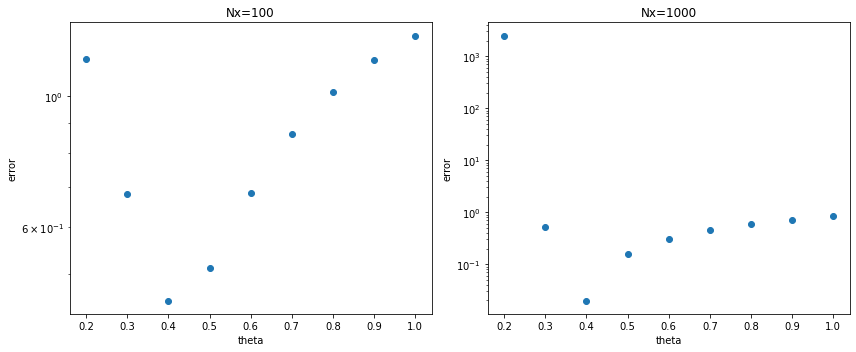

In [27]:
plt.figure(figsize=(12, 5)) 
thetas = np.arange(2,11)/10


parameters = {"a":0,"b":1, "Nx":100, "cfl":5, "mesh_type":"offset_constantDx",
              "params":.2, "init_func":"bell", "tf":.1, "theta":0, "Scheme":"Theta"}
values = []
for theta in thetas:
    parameters["theta"] = theta
    solving = Problem(**parameters)
    values.append(compare_errors(solving.sol_num, solving.sol_ex()))

plt.subplot(1, 2, 1)
plt.scatter(thetas, values)
plt.title("Nx=100")
plt.xlabel('theta')
plt.ylabel('error')
plt.yscale('log')
#plt.legend()

parameters = {"a":0,"b":1, "Nx":1000, "cfl":5, "mesh_type":"offset_constantDx",
              "params":.2, "init_func":"bell", "tf":.1, "theta":0, "Scheme":"Theta"}
values = []
for theta in thetas:
    parameters["theta"] = theta
    solving = Problem(**parameters)
    values.append(compare_errors(solving.sol_num, solving.sol_ex()))

plt.subplot(1, 2, 2)
plt.scatter(thetas, values)
plt.title("Nx=1000")
plt.xlabel('theta')
plt.ylabel('error')

plt.yscale('log')
plt.tight_layout()
plt.show()

These plots are in Log Scale

we will now work with high density grids. This is also more interesting because we will check for convergence after. Let's take Nx = 2000. The computations should not be too long.

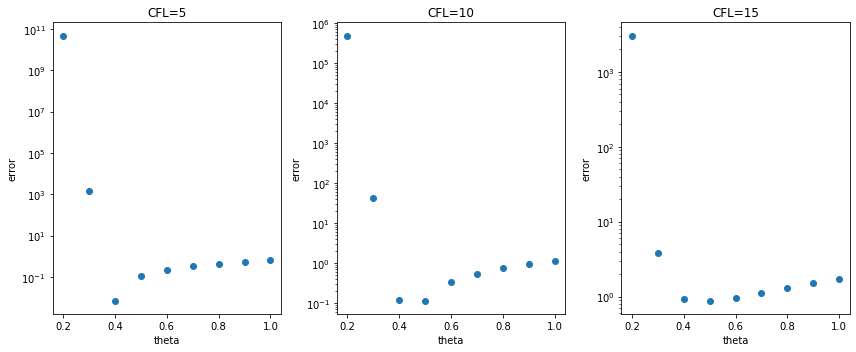

In [31]:
plt.figure(figsize=(12, 5)) 
thetas = np.arange(2,11)/10


parameters = {"a":0,"b":1, "Nx":2000, "cfl":5, "mesh_type":"offset_constantDx",
              "params":.2, "init_func":"bell", "tf":.1, "theta":0, "Scheme":"Theta"}
values = []
for theta in thetas:
    parameters["theta"] = theta
    solving = Problem(**parameters)
    values.append(compare_errors(solving.sol_num, solving.sol_ex()))

plt.subplot(1, 3, 1)
plt.scatter(thetas, values)
plt.title("CFL=5")
plt.xlabel('theta')
plt.ylabel('error')
plt.yscale('log')
#plt.legend()

parameters = {"a":0,"b":1, "Nx":2000, "cfl":10, "mesh_type":"offset_constantDx",
              "params":.2, "init_func":"bell", "tf":.1, "theta":0, "Scheme":"Theta"}
values = []
for theta in thetas:
    parameters["theta"] = theta
    solving = Problem(**parameters)
    values.append(compare_errors(solving.sol_num, solving.sol_ex()))

plt.subplot(1, 3, 2)
plt.scatter(thetas, values)
plt.title("CFL=10")
plt.xlabel('theta')
plt.ylabel('error')
plt.yscale('log')

parameters = {"a":0,"b":1, "Nx":2000, "cfl":15, "mesh_type":"offset_constantDx",
              "params":.2, "init_func":"bell", "tf":.1, "theta":0, "Scheme":"Theta"}
values = []
for theta in thetas:
    parameters["theta"] = theta
    solving = Problem(**parameters)
    values.append(compare_errors(solving.sol_num, solving.sol_ex()))

plt.subplot(1, 3, 3)
plt.scatter(thetas, values)
plt.title("CFL=15")
plt.xlabel('theta')
plt.ylabel('error')
plt.yscale('log')

plt.tight_layout()
plt.show()

As the end of our preliminary study, we can see that the best suited scheme to adapt to bad CFL conditions is the Crank-Nicholson Scheme (theta = 0.5). This shows that mixed schemes are a good start to our approach of the problems that interest us in this project.